In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
%matplotlib inline
pd.set_option('max_columns', 500)

for file in os.listdir('data/DataFiles/')[:-1]:
    df = pd.read_csv('data/DataFiles/' + file)
    print('File: {} / # of rows: {} / columns: {}'.format(file, len(df), df.columns))

File: Cities.csv / # of rows: 404 / columns: Index(['CityID', 'City', 'State'], dtype='object')
File: Conferences.csv / # of rows: 51 / columns: Index(['ConfAbbrev', 'Description'], dtype='object')
File: ConferenceTourneyGames.csv / # of rows: 4563 / columns: Index(['Season', 'ConfAbbrev', 'DayNum', 'WTeamID', 'LTeamID'], dtype='object')
File: GameCities.csv / # of rows: 43696 / columns: Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'CRType', 'CityID'], dtype='object')
File: NCAATourneyCompactResults.csv / # of rows: 2117 / columns: Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT'],
      dtype='object')
File: NCAATourneyDetailedResults.csv / # of rows: 981 / columns: Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAs

In [17]:
teams = pd.read_csv('data/DataFiles/teams.csv')
teams[teams['TeamName']=='Syracuse']

,TeamID,TeamName,FirstD1Season,LastD1Season
292,1393,Syracuse,1985,2018


In [109]:
reg_season = pd.read_csv('data/DataFiles/RegularSeasonDetailedResults.csv')
massey = pd.read_csv('data/MasseyOrdinals.csv')

In [110]:
syr_results = reg_season[(reg_season['WTeamID'] == 1393) | (reg_season['LTeamID'] == 1393)]

In [111]:
massey_pivot = pd.pivot_table(massey, 
                              'OrdinalRank', 
                              index=['Season', 'RankingDayNum', 'TeamID'], 
                              columns = 'SystemName').reset_index()
massey_pivot.head()

SystemName,Season,RankingDayNum,TeamID,7OT,ACU,ADE,AP,ARG,AUS,BBT,BCM,BD,BIH,BKM,BLS,BNM,BOB,BOW,BP5,BPI,BRZ,BUR,BWE,CJB,CMV,CNG,COL,CPA,CPR,CRO,CRW,CTL,D1A,DAV,DC,DC2,DCI,DDB,DES,DII,DOK,DOL,DUN,DWH,EBB,EBP,ECK,ENT,ERD,ESR,FAS,FMG,FSH,GC,GRN,GRS,HAS,HAT,HER,HKB,HKS,HOL,HRN,IMS,INP,ISR,JCI,JEN,JNG,JON,JRT,KBM,KEL,KLK,KMV,KOS,KPI,KPK,KRA,LMC,LOG,LYD,LYN,MAS,MB,MCL,MGY,MIC,MKV,MOR,MPI,MSX,MUZ,MvG,NOL,NOR,OCT,OMY,PEQ,PGH,PH,PIG,PKL,PMC,POM,PPR,PRR,PTS,RAG,REI,REN,REW,RIS,RM,ROG,ROH,RPI,RSE,RSL,RT,RTB,RTH,RTP,RTR,SAG,SAP,SAU,SCR,SE,SEL,SFX,SGR,SIM,SMN,SMS,SP,SPR,SPW,STF,STH,STR,STS,TBD,TMR,TOL,TPR,TRK,TRP,TRX,TSR,TW,UCS,UPS,USA,WIL,WLK,WMR,WOB,WOL,WTE,YAG,ZAM
0,2003,35,1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,35,1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,35,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,35,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,35,1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
massey_cleaned = massey_pivot.sort_values(['Season', 'TeamID', 'RankingDayNum']).fillna(method='ffill')

In [113]:
syr = pd.merge(syr_results, massey_cleaned, left_on=['WTeamID', 'DayNum', 'Season'], right_on=['TeamID', 'RankingDayNum', 'Season'], how='left')

In [114]:
syr = pd.merge(syr, massey_cleaned, left_on=['LTeamID', 'DayNum', 'Season'], right_on=['TeamID', 'RankingDayNum', 'Season'], how='left')

In [115]:
rankings = [rank for rank in massey_cleaned.columns if not any(y in rank for y in ('TeamID', 'Season', 'RankingDayNum'))]

for i in rankings:
    syr[i] = np.where(syr[i + '_x'].isnull(), syr[i + '_y'], syr[i + '_x'])

In [119]:
drops = [col for col in syr.columns if any(y in col for y in ('_x', '_y'))]

syr.drop(drops, axis=1).head(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,7OT,ACU,ADE,AP,ARG,AUS,BBT,BCM,BD,BIH,BKM,BLS,BNM,BOB,BOW,BP5,BPI,BRZ,BUR,BWE,CJB,CMV,CNG,COL,CPA,CPR,CRO,CRW,CTL,D1A,DAV,DC,DC2,DCI,DDB,DES,DII,DOK,DOL,DUN,DWH,EBB,EBP,ECK,ENT,ERD,ESR,FAS,FMG,FSH,GC,GRN,GRS,HAS,HAT,HER,HKB,HKS,HOL,HRN,IMS,INP,ISR,JCI,JEN,JNG,JON,JRT,KBM,KEL,KLK,KMV,KOS,KPI,KPK,KRA,LMC,LOG,LYD,LYN,MAS,MB,MCL,MGY,MIC,MKV,MOR,MPI,MSX,MUZ,MvG,NOL,NOR,OCT,OMY,PEQ,PGH,PH,PIG,PKL,PMC,POM,PPR,PRR,PTS,RAG,REI,REN,REW,RIS,RM,ROG,ROH,RPI,RSE,RSL,RT,RTB,RTH,RTP,RTR,SAG,SAP,SAU,SCR,SE,SEL,SFX,SGR,SIM,SMN,SMS,SP,SPR,SPW,STF,STH,STR,STS,TBD,TMR,TOL,TPR,TRK,TRP,TRX,TSR,TW,UCS,UPS,USA,WIL,WLK,WMR,WOB,WOL,WTE,YAG,ZAM
0,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,20,1393,81,1434,66,H,0,25,58,7,18,24,35,11,26,19,13,10,4,18,23,63,4,18,16,23,17,26,13,20,10,3,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,29,1393,98,1159,68,H,0,35,63,8,13,20,32,12,31,23,13,10,10,11,26,75,10,27,6,8,19,21,17,16,6,0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,32,1393,85,1165,62,H,0,30,61,5,17,20,30,14,33,21,13,12,7,15,25,69,9,30,3,9,16,21,18,13,8,1,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,36,1393,92,1422,65,H,0,36,70,6,11,14,20,18,22,17,8,12,11,10,25,58,7,20,8,11,13,18,17,20,3,2,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Functions

In [191]:
# Remove bracket (W, S, E, N) from seed and convert to integer
def seed_to_int(seed):
    #Get just the digits from the seeding. Return as int
    s_int = int(seed[1:3])
    return s_int

def fit_and_evaluate(model, X_col, X_train, y_train, X_val, y_val):
    model_fit = model.fit(X_train[X_col], y_train)
    y_pred = model_fit.predict_proba(X_val[X_col])
    results = pd.concat([pd.DataFrame(y_pred[:,1]), 
                         pd.DataFrame(y_val).reset_index(drop=True)], axis=1)
    results.columns = ['pred', 'label']
    
    ll = log_loss(results['label'], results['pred'])
    
    bins = np.linspace(0, 1, 40)
    pyplot.hist(results[results['label'] == 1]['pred'], bins, alpha=0.5, normed=True, label='win')
    pyplot.hist(results[results['label'] == 0]['pred'], bins, alpha = 0.5, normed=True, label='loss')
    pyplot.legend(loc='upper left')
    pyplot.title('{} Results ({} log-loss)'.format(str(model).split('(')[0], round(ll, 3)))
    pyplot.show()

To Do:
- Concatenate season information (pts score, etc)
- Try stacking
    - Tournament seed model
    - Rankings model
    - Season stats model
    - Location model?

## Read in data

In [203]:
df_tour = pd.read_csv('data/DataFiles/NCAATourneyCompactResults.csv')
df_seeds = pd.read_csv('data/DataFiles/NCAATourneySeeds.csv')
df_massey = pd.read_csv('data/MasseyOrdinals.csv')

## Create training and test set

In [204]:
df_tour.drop(['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)

# Create dataframe of wins (seasons since 2002)
df_tour_wins = pd.DataFrame()
df_tour_wins = df_tour[df_tour['Season'] > 2002]
df_tour_wins['Result'] = 1

# Create dataframe of losses (seasons since 2002)
df_tour_losses = pd.DataFrame()
df_tour_losses = df_tour[df_tour['Season'] > 2002]
df_tour_losses = df_tour.rename(columns={
    'WTeamID': 'LTeamID',
    'LTeamID': 'WTeamID',
})
df_tour_losses['Result'] = 0

df_tourney_full = pd.concat([df_tour_wins, df_tour_losses])

X_train, X_test, y_train, y_test = train_test_split(df_tourney_full[['Season', 'WTeamID', 'LTeamID']], df_tourney_full['Result'], test_size=0.5)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3)

print('Full: {} rows / Train: {} rows / Val: {} / Test: {} rows'.format(
    len(df_tourney_full), len(X_train), len(X_val), len(X_test)))

Full: 3098 rows / Train: 1549 rows / Val: 1084 / Test: 465 rows


/Users/djedamski/.pyenv/versions/3.5.3/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Tournament seeding model

In [205]:
df_seeds['Seed'] = df_seeds['Seed'].apply(lambda x: seed_to_int(x))

# Create copies of seeds df to join to winning ID and losing ID
df_winseeds = df_seeds.rename(columns={'TeamID':'WTeamID', 'Seed':'WSeed'})
df_lossseeds = df_seeds.rename(columns={'TeamID':'LTeamID', 'Seed':'LSeed'})

# Join seeds to training set
train_dummy = pd.merge(X_train, df_winseeds, how='left', on=['Season', 'WTeamID'])
X_train_seeds = pd.merge(train_dummy, df_lossseeds, on=['Season', 'LTeamID'])

# Join seeds to validation set
val_dummy = pd.merge(X_val, df_winseeds, how='left', on=['Season', 'WTeamID'])
X_val_seeds = pd.merge(val_dummy, df_lossseeds, on=['Season', 'LTeamID'])

# Join seeds to test set
test_dummy = pd.merge(X_test, df_winseeds, how='left', on=['Season', 'WTeamID'])
X_test_seeds = pd.merge(test_dummy, df_lossseeds, on=['Season', 'LTeamID'])

print('Training shape: {}'.format(X_train_seeds.shape))
print('Val shape: {}'.format(X_val_seeds.shape))
print('Test shape: {}'.format(X_test_seeds.shape))

Training shape: (1549, 5)
Val shape: (1084, 5)
Test shape: (465, 5)


In [206]:
# Define X columns and split into training and test sets
seeds_col = ['WSeed', 'LSeed']

# Define models to test
RF = RandomForestClassifier(n_estimators=200)
GBT = GradientBoostingClassifier(n_estimators=100, max_depth=3)
Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=150)
LR = LogisticRegression()
MLP = MLPClassifier()

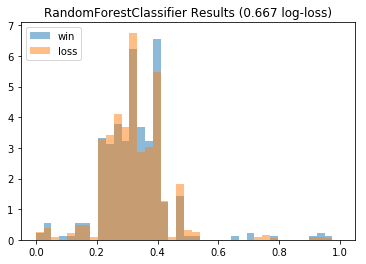

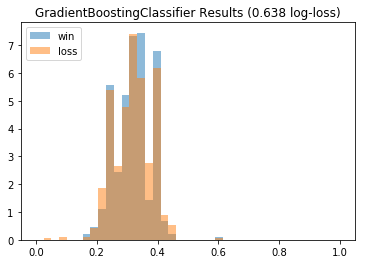

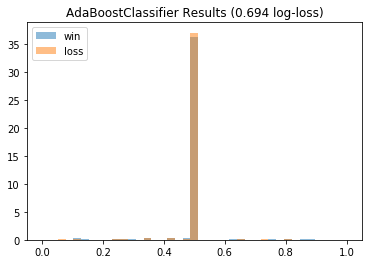

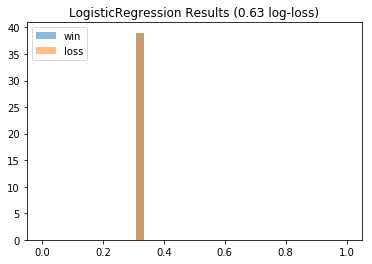

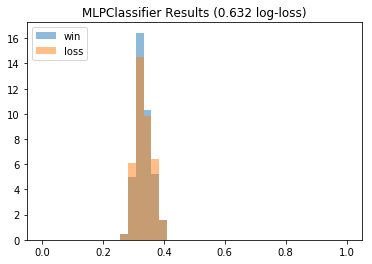

In [207]:
fit_and_evaluate(RF, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(GBT, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(Ada, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(LR, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(MLP, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)

## Rankings model

### Clean up the Massey rankings

In [62]:
# Pivot the rankings to have one ranking per column (one row per day/team/season)
df_massey_clean = pd.pivot_table(df_massey, 
                              'OrdinalRank', 
                              index=['Season', 'RankingDayNum', 'TeamID'], 
                              columns = 'SystemName').reset_index()

# Pull out the names of the rankings into a list
rankings = [rank for rank in df_massey_clean.columns 
                if not any(y in rank for y in ('TeamID', 'Season', 'RankingDayNum'))]

# Cycle through each team/season and fill NA w/ forward fill and append to empty df
# This is to fill all the days where there aren't new rankings out
rankings_df = pd.DataFrame()
for team in df_massey_clean['TeamID'].drop_duplicates():
    for year in df_massey_clean['Season'].drop_duplicates():
        line = df_massey_clean[(df_massey_clean['TeamID']==team) & (df_massey_clean['Season']==year)]
        line_clean = line.sort_values('RankingDayNum').fillna(method='ffill')
        rankings_df = rankings_df.append(line_clean)

In [234]:
# Pull out the rankings for: early in season, ~30 days before tournament, and on Selection sUNDAY
rankings_early = rankings_df[rankings_df['RankingDayNum'].between(45, 70, inclusive=True)]
rankings_mid = rankings_df[rankings_df['RankingDayNum'].between(90, 100, inclusive=True)]
rankings_late = rankings_df[rankings_df['RankingDayNum'].between(125, 135, inclusive=True)]

# Generate the mean of each ranking across these days
rankings_summary_early = rankings_early.groupby(['TeamID', 'Season']).mean()
rankings_summary_mid = rankings_mid.groupby(['TeamID', 'Season']).mean()
rankings_summary_late = rankings_late.groupby(['TeamID', 'Season']).mean()

# Take the average across ALL rankings
rankings_early_mean = rankings_summary_early[rankings].mean(axis=1)
rankings_mid_mean = rankings_summary_mid[rankings].mean(axis=1)

# Take the average, min, and max across ALL rankings
rankings_late_mean = rankings_summary_late[rankings].mean(axis=1)
rankings_late_min = rankings_summary_late[rankings].min(axis=1)
rankings_late_max = rankings_summary_late[rankings].max(axis=1)

# Concatenate all results into one df
rankings_full = pd.concat([rankings_early_mean, rankings_mid_mean, rankings_late_mean, rankings_late_min, 
                           rankings_late_max], axis=1).reset_index()
rankings_full.columns = ['TeamID', 'Season', 'rnk_mean_early', 'rnk_mean_mid', 'rnk_mean_late', 
                         'rnk_min_late', 'rnk_max_late']

In [235]:
# Create winning and losing dataframe to merge into tournament results
win_ranks = rankings_full.rename(columns={'TeamID': 'WTeamID',
                                          'rnk_mean_early':'Wrnk_mean_early',
                                          'rnk_mean_mid':'Wrnk_mean_mid',
                                          'rnk_mean_late':'Wrnk_mean_late',
                                          'rnk_min_late':'Wrnk_min_late',
                                          'rnk_max_late':'Wrnk_max_late'})
loss_ranks = rankings_full.rename(columns={'TeamID': 'LTeamID',
                                           'rnk_mean_early':'Lrnk_mean_early',
                                           'rnk_mean_mid':'Lrnk_mean_mid',
                                           'rnk_mean_late':'Lrnk_mean_late',
                                           'rnk_min_late':'Lrnk_min_late',
                                           'rnk_max_late':'Lrnk_max_late'})

# Join rankings to training set
train_dummy = pd.merge(X_train, win_ranks, how='left', on=['Season', 'WTeamID'])
X_train_ranks = pd.merge(train_dummy, loss_ranks, how='left', on=['Season', 'LTeamID'])

# Join rankings to validation set
val_dummy = pd.merge(X_val, win_ranks, how='left', on=['Season', 'WTeamID'])
X_val_ranks = pd.merge(val_dummy, loss_ranks, how='left', on=['Season', 'LTeamID'])

# Join rankings to test set
test_dummy = pd.merge(X_test, win_ranks, how='left', on=['Season', 'WTeamID'])
X_test_ranks = pd.merge(test_dummy, loss_ranks, how='left', on=['Season', 'LTeamID'])

print('Training shape: {}'.format(X_train_ranks.shape))
print('Val shape: {}'.format(X_val_ranks.shape))
print('Test shape: {}'.format(X_test_ranks.shape))

Training shape: (1549, 13)
Val shape: (1084, 13)
Test shape: (465, 13)


In [236]:
# Pull out columns that we want for our final training set
ranks_col = [col for col in X_train_ranks.columns 
       if not any(y in col for y in ('Season', 'WTeamID', 'LTeamID'))]
print(ranks_col)

X_train_ranks = X_train_ranks.fillna(500)
X_val_ranks = X_val_ranks.fillna(500)
X_test_ranks = X_test_ranks.fillna(500)

# Define models to test
RF = RandomForestClassifier(n_estimators=200)
GBT = GradientBoostingClassifier(n_estimators=100, max_depth=3)
Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=150)
LR = LogisticRegression()
MLP = MLPClassifier()

['Wrnk_mean_early', 'Wrnk_mean_mid', 'Wrnk_mean_late', 'Wrnk_min_late', 'Wrnk_max_late', 'Lrnk_mean_early', 'Lrnk_mean_mid', 'Lrnk_mean_late', 'Lrnk_min_late', 'Lrnk_max_late']


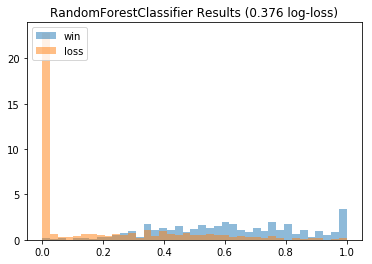

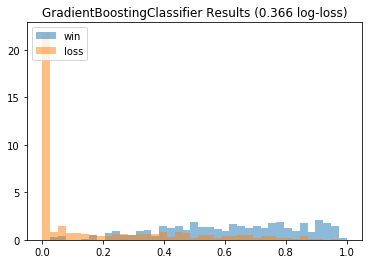

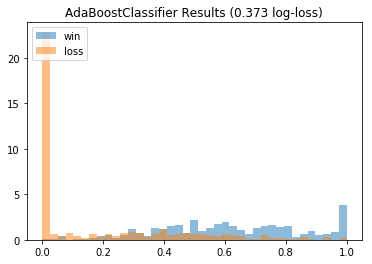

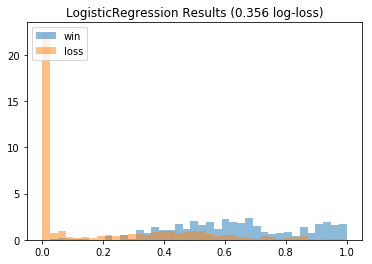

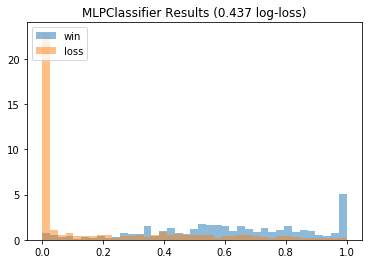

In [215]:
fit_and_evaluate(RF, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(GBT, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(Ada, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(LR, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(MLP, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)

## Stack Models

### Final Model Fitting

In [237]:
# Seeds model
GBT = GradientBoostingClassifier(n_estimators=100, max_depth=3)
LR = LogisticRegression()

GBT_seeds_fit = GBT.fit(X_train_seeds[seeds_col], y_train)
LR_seeds_fit = LR.fit(X_train_seeds[seeds_col], y_train)

GBT_seeds_val_pred = GBT_seeds_fit.predict_proba(X_val_seeds[seeds_col])
LR_seeds_val_pred = LR_seeds_fit.predict_proba(X_val_seeds[seeds_col])

GBT_seeds_test_pred = GBT_seeds_fit.predict_proba(X_test_seeds[seeds_col])
LR_seeds_test_pred = LR_seeds_fit.predict_proba(X_test_seeds[seeds_col])

# Ranks model
RF = RandomForestClassifier(n_estimators=200)
LR = LogisticRegression()

RF_ranks_fit = RF.fit(X_train_ranks[ranks_col], y_train)
LR_ranks_fit = LR.fit(X_train_ranks[ranks_col], y_train)

RF_ranks_val_pred = RF_ranks_fit.predict_proba(X_val_ranks[ranks_col])
LR_ranks_val_pred = LR_ranks_fit.predict_proba(X_val_ranks[ranks_col])

RF_ranks_test_pred = RF_ranks_fit.predict_proba(X_test_ranks[ranks_col])
LR_ranks_test_pred = LR_ranks_fit.predict_proba(X_test_ranks[ranks_col])

1084 1084 465 465
1084 1084 465 465


### Aggregate Results

In [238]:
val_results = pd.concat([X_val.reset_index(drop=True),
                          pd.DataFrame(y_val).reset_index(drop=True),
                          pd.DataFrame(GBT_seeds_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(LR_seeds_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(RF_ranks_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(LR_ranks_val_pred[:,1]).reset_index(drop=True)], axis=1)
val_results.columns = ['Season', 'WTeamID', 'LTeamID', 'label', 'GBT_seed', 'LR_seed', 'RF_rank', 'LR_rank']

test_results = pd.concat([X_test.reset_index(drop=True),
                          pd.DataFrame(y_test).reset_index(drop=True),
                          pd.DataFrame(GBT_seeds_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(LR_seeds_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(RF_ranks_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(LR_ranks_test_pred[:,1]).reset_index(drop=True)], axis=1)
test_results.columns = ['Season', 'WTeamID', 'LTeamID', 'label', 'GBT_seed', 'LR_seed', 'RF_rank', 'LR_rank']

In [242]:
final_col = [col for col in val_results.columns 
                if any(y in col for y in ('_seed', '_rank'))]
print(final_col)

RF = RandomForestClassifier(n_estimators=200)
GBT = GradientBoostingClassifier(n_estimators=100, max_depth=3)
Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=150)
LR = LogisticRegression()
MLP = MLPClassifier()

['GBT_seed', 'LR_seed', 'RF_rank', 'LR_rank']


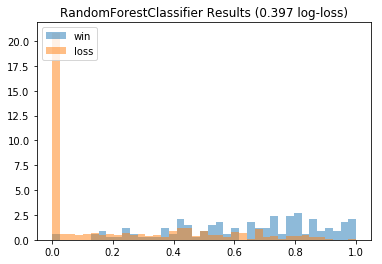

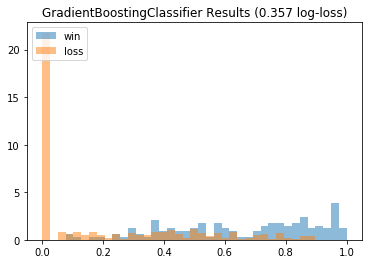

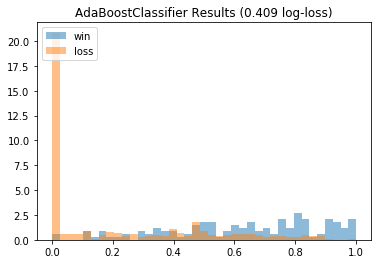

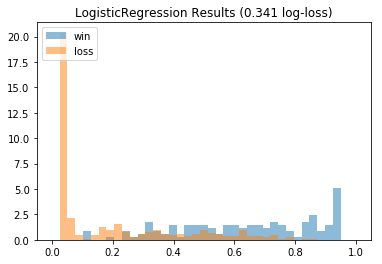

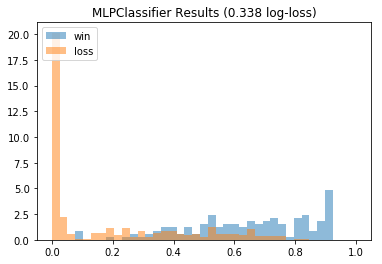

In [243]:
fit_and_evaluate(RF, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(GBT, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(Ada, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(LR, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(MLP, final_col, val_results, val_results['label'], test_results, y_test)

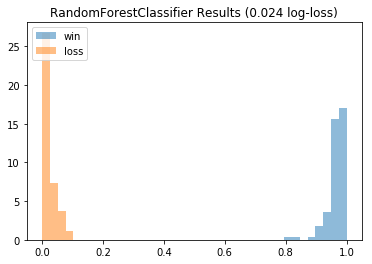

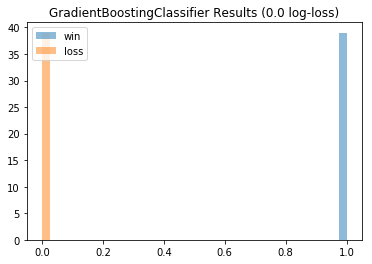

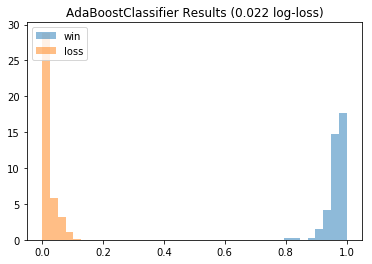

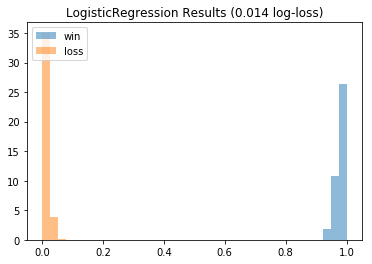

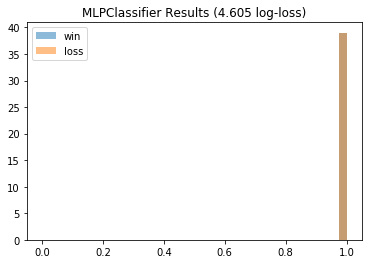

In [244]:
final_col = [col for col in val_results.columns 
                if any(y in col for y in ('_rank'))]

fit_and_evaluate(RF, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(GBT, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(Ada, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(LR, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(MLP, final_col, val_results, val_results['label'], test_results, y_test)